# Projeto Módulo 01 -  Análise Exploratória: Produção Hospitalar (SIH/SUS)
## Análise exploratória dos dados do DATASUS - Produção Hospital (SIH/SUS)

# Visão geral do projeto:

## 1. Nota ténica e origem dos dados utilizados
## 2. Importação e Organização dos dados
## 3. Primeiras visualizações
## 4. Mais alguns ajustes nos dados
## 5. Análises e Hipóteses
## 6. Pesquisa complementar
## 7. Conclusão
## 8. Referências e citações

---

<br><br>

## 1. Nota ténica e origem dos dados utilizados

Origem dos dados: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Nota técnica dos dados: http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf


### AIH aprovadas
Quantidade de AIH(Autorização de Internação Hospitalar) aprovadas no período, tanto de novas internações como de prorrogação (longa permanência). Não estão computadas as AIH rejeitadas.

Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: AIH aprovadas
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
     dataset path: "../datasets/AIH_aprovadas.csv"
     
### Média de Permanência
Média de permanência das internações referentes às AIH aprovadas, computadas como internações, no período.

Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Média permanência
 - Períodos disponíveis: Jan/2008 até Mar/2021

     dataset path: "../datasets/A111057189_28_143_208.csv"
 
### Óbitos
Quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período. 

 Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Óbitos
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
    datset path: "../datasets/A111605189_28_143_208.csv"
---

In [1]:
#importação das bibliotecas utilizadas no decorrer do notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

## 2. Importação e Organização dos dados

Após o download dos arquivos no tabnet do DATASUS, vamos ler e importar os dados para dataframes especificos utilizando Pandas, onde o padrão para declaração das variáveis será utilizando o pré-fixo "df" para o que for um dataframe, seguido de uma descrição feita no padrão "snake_case".

**Obs:** em uma análise isolada aos dados nos arquivos ".csv", verifiquei que o melhor cenário para atuar é entre **2008/Fev até 2020/Dez** devido algumas inconsistencias e outliers no começo e/ou no final de cada dataset utilizados!

### 2.1 Importando e padronizando os datasets 

Para importar e padronizar os dados, estou utilizando a função ".read_csv" da biblioteca pandas, onde é possível fazer uma série de tratativas que irei detalhar em cada célula a fim de entender o que está acontecendo com cada conjunto de dados.

#### 2.1.1 Importando e padronizando: AIH aprovadas

In [2]:
#Lendo o arquivo "../datasets/AIH_aprovadas.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido a ultima linha com o skipfooter para remover o total já calculado
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_aih_aprovadas = pd.read_csv("../datasets/AIH_aprovadas.csv", sep=";", 
                   encoding="ISO-8859-1",
                   usecols = [i for i in range(287) if (i == 0 or i > 127 and i < 283)],
                   skipfooter=1, engine='python')
#setando o index como "Unidade da Federação"
df_aih_aprovadas = df_aih_aprovadas.set_index("Unidade da Federação")
df_aih_aprovadas.head(3)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,...,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362
12 Acre,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,...,3668,2840,2818,3073,3571,3574,3725,3985,3849,3861
13 Amazonas,13830,14870,14323,14914,14578,14938,14419,13349,12607,12137,...,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213


#### 2.1.2 Importando e padronizando: Média de permanência

In [3]:
#Lendo o arquivo "../datasets/A111057189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#Com o "decimal" deliminamos as casas decimais do dataset
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_media_permanencia = pd.read_csv("../datasets/A111057189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",decimal=",",
                   usecols = [i for i in range(172) if (i == 0 or i > 13 and i < 169)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_media_permanencia = df_media_permanencia.set_index("Unidade da Federação")
df_media_permanencia.head(3)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,3.4,3.8,4.0,4.7,4.2,3.9,3.6,3.6,3.5,3.6,...,4.3,4.8,4.5,4.7,4.7,4.7,4.5,4.6,4.4,4.4
12 Acre,4.8,4.6,4.6,4.5,4.3,4.2,4.0,4.2,4.4,4.3,...,4.6,4.6,4.6,5.4,5.1,4.7,4.5,4.6,4.6,4.9
13 Amazonas,4.9,4.7,4.8,4.9,4.7,4.7,4.5,4.6,4.6,4.5,...,5.0,5.3,5.5,5.5,5.3,5.4,5.3,5.3,5.3,5.2


#### 2.1.3 Importando e padronizando: Óbitos

In [4]:
#Lendo o arquivo "../datasets/A111605189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#com o "thousands" delimitamos a separação dos milhares
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_obitos = pd.read_csv("../datasets/A111605189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",thousands=".",
                   usecols = [i for i in range(180) if (i == 0 or i > 21 and i < 177)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_obitos = df_obitos.set_index("Unidade da Federação")
df_obitos.head(3)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,65,103,96,92,106,80,71,77,87,79,...,274,278,377,444,386,423,335,283,326,402
12 Acre,115,110,103,103,96,92,38,72,88,77,...,126,157,190,205,200,150,131,122,147,172
13 Amazonas,306,272,295,304,286,245,233,205,236,204,...,606,1525,1335,750,720,684,693,691,759,999


## 3. Primeiras visualizações dos dados
Para começarmos a ter uma noção do comportamento geral dos nossos dados, vamos começar a plotar alguns gráficos referentes aos dataframes criados!

**Nota:** *como estamos mostrando todos os dados de todos meses e estados de uma vez só, os gráficos irão ficar confusos mesmo, porém a ideia aqui é ter uma noção rápida do comportamento geral. Podemos verificar quais estados tem um destaque dos outros em relação ao eixo X ou Y de cada conjuto de dados!*

### 3.1 Plotando gráficos com todos os dados

#### 3.1.1 Plotando gráficos: AIH aprovadas

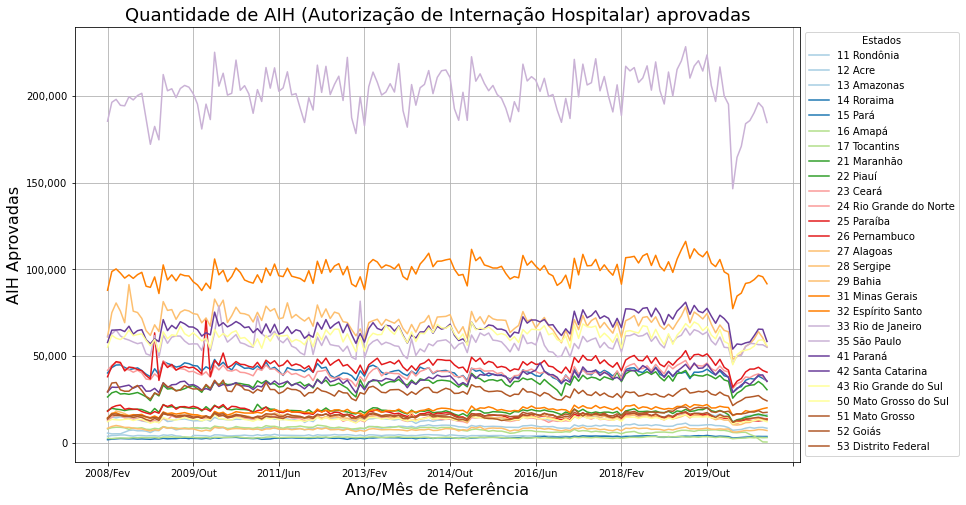

In [5]:
#Plotagem do gráfico da quantidade de AIH aprovadas por estado
ax = df_aih_aprovadas.T.plot(figsize=(13,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('AIH Aprovadas', fontsize=16) #Descrição do eixo Y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Quantidade de AIH (Autorização de Internação Hospitalar) aprovadas', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico

Nesse gráfico das AIH aprovadas, verificamos que existe um estado _(São Paulo)_ que tem, no mínimo, o dobro de AIH aprovadas que qualquer outro estado isolado. <br>Porém, para os outros, começa a ficar um pouco difícil de entender e visualizar a diferença entre eles devido ao grande volume de estados num mesmo espaço muito pequeno.


#### 3.1.2 Plotando gráficos: Média de permanência

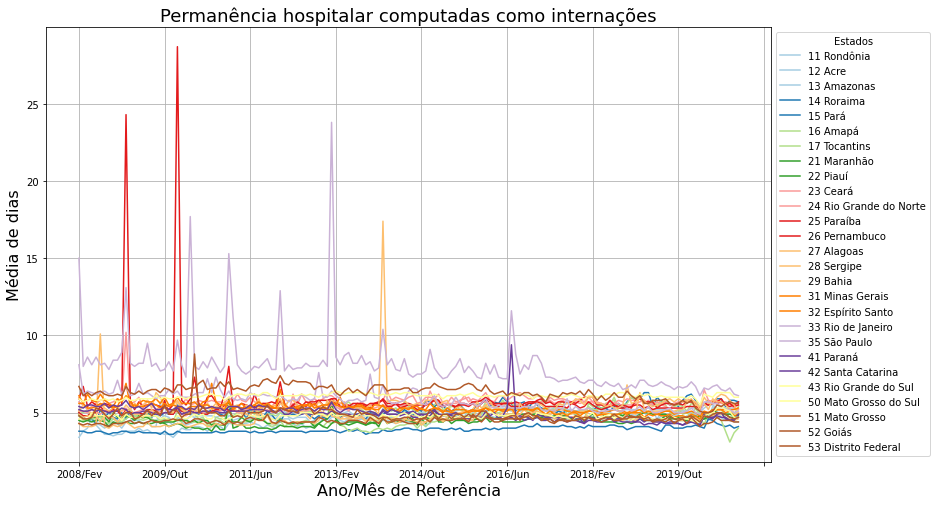

In [6]:
#Plotagem do gráfico da média de dias de permanência referentes às AIH aprovadas, computadas como internações, no período por estado
ax = df_media_permanencia.T.plot(figsize=(13,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('Média de dias', fontsize=16) #Descrição do eixo Y
plt.title('Permanência hospitalar computadas como internações', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico

O mesmo acontece para esse gráfico de Média de permanência, até conseguimos visualizar alguns padrões dos estados com um volume maior, porém quando vamos tentar ver os outros valores temos um emaranhado de informações que deixa a visualização toda confusa.

#### 3.1.3 Plotando gráficos: Óbitos

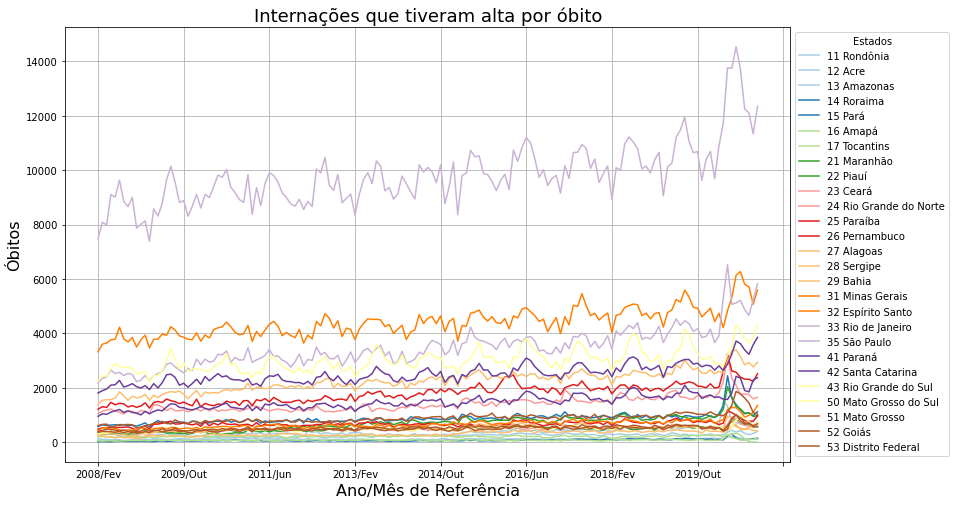

In [7]:
#Plotagem do gráfico da quantidade de internações que tiveram alta por óbitos referentes às AIH aprovadas no período por estado
ax = df_obitos.T.plot(figsize=(13,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('Óbitos', fontsize=16) #Descrição do eixo Y
plt.title('Internações que tiveram alta por óbito', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico

Aqui, no gráfico de Óbitos, temos um padrão semelhante aos anteriores, porém, conseguimos ver que no final de 2019 e no ano de 2020 tivemos uma crescente quase que generalizada em todos os estados, provavelmente por conta da atual pandemia, porém, como não vamos entrar nesse assunto no momento não irei bater o martelo em uma conclusão dos fatos.

### 4. Mais alguns ajustes nos dados

Como vimos em todos os gráficos anteriores, apesar de conseguir tirar alguns insights como tendência geral de crescimento e conseguir visualizar qual o estado que tem um volume maior em relação aos outros, o gráfico começa a ficar muito confuso quanto temos diversas informações num espaço muito pequeno, por conta disso, vamos criar uma categorização que irá agrupar os estados pela sua região em relação ao país, ou seja, vamos deixar os estados do Sul em uma categoria só, assim como os estados do Norte, Nordetes, Sudeste e Centro-Oeste vão ter seus próprios agrupamentos e com isso, na hora de plotar os gráficos, vamos podemos trabalhar isoladamente com um estado por vez, vendo os estados únicos de cada região.

In [16]:
coluna_regiao=[] #criando uma lista para registrar os valores das regiões em relação aos estados
coluna_estado=[] #criando uma lista para registrar os valores dos estados sem o identificador número que contém no indíce

regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'] #criando uma lista com as regiões pré-definidas

for linha in df_aih_aprovadas.iterrows(): #aqui iniciamos um loop for que vai percorrer todas as linhas do "df_aih_aprovadas" 
                                        #para pegar a "Unidade da Federação"(os valores dos estados) e fazer as validações
                                        #porém aqui a gente podia usar qualquer um dos dataframes, dado que todos estão ordenados pela Unidade da Federação
    
    estado=linha[0] #criamos uma variável "estado" para pegar o valor de cada estado, que é o indice 0 de cada linha
    id_regiao = int(estado.split(' ')[0]) #aqui pegamos o identificador da região, que no caso são os numeros antes do nome do estado
    estado_sem_id = estado.split(' ', maxsplit = 1)[1] #aqui pegamos apenas o nome do estado
    
    coluna_estado.append(estado_sem_id) #adicionando os estados à lista coluna_estado
    
    #aqui verificamos cada id e adicionamos à coluna_regiao o valor referente da região do estado
    if id_regiao < 20:
        coluna_regiao.append(regioes[0])
    elif id_regiao < 30:
        coluna_regiao.append(regioes[1])
    elif id_regiao < 40:
        coluna_regiao.append(regioes[2])
    elif id_regiao < 50:
        coluna_regiao.append(regioes[3])
    else:
        coluna_regiao.append(regioes[4])
        
#adicionamos os valores de coluna_regiao para cada dataframe
df_aih_aprovadas["Região"] = coluna_regiao
df_media_permanencia["Região"] = coluna_regiao
df_obitos["Região"] = coluna_regiao

#adicionamos os valores da coluna_estado para cada dataframe
df_aih_aprovadas["Estado"] = coluna_estado
df_media_permanencia["Estado"] = coluna_estado
df_obitos["Estado"] = coluna_estado


In [9]:
#agora podemos verificar a coluna "Região" de todos os dataframes em relação ao indíce "Unidade da Federação"
df_media_permanencia["Região"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

In [17]:
#também podemos verificar a coluna "Estado" de todos dataframes em relação ao indíce
df_obitos["Estado"]

Unidade da Federação
11 Rondônia                          Rondônia
12 Acre                                  Acre
13 Amazonas                          Amazonas
14 Roraima                            Roraima
15 Pará                                  Pará
16 Amapá                                Amapá
17 Tocantins                        Tocantins
21 Maranhão                          Maranhão
22 Piauí                                Piauí
23 Ceará                                Ceará
24 Rio Grande do Norte    Rio Grande do Norte
25 Paraíba                            Paraíba
26 Pernambuco                      Pernambuco
27 Alagoas                            Alagoas
28 Sergipe                            Sergipe
29 Bahia                                Bahia
31 Minas Gerais                  Minas Gerais
32 Espírito Santo              Espírito Santo
33 Rio de Janeiro              Rio de Janeiro
35 São Paulo                        São Paulo
41 Paraná                              Paraná
42 Santa Cata

<AxesSubplot:xlabel='Unidade da Federação'>

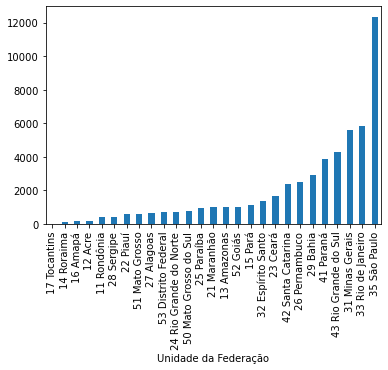

In [23]:
df_obitos["2020/Dez"].sort_values().plot(kind='bar')

ax = temp_df_obitos.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(13,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()